In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# MNIST Data Pre-processing
import numpy as np
import keras
import tensorflow as tf
from keras.datasets import mnist
from keras.utils import np_utils  # utilities for one-hot encoding of ground truth values

import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"

%load_ext autoreload
%autoreload 2

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = np_utils.to_categorical(y_train, 10).astype(np.float32)
y_test = np_utils.to_categorical(y_test, 10).astype(np.float32)

In [6]:
from AdvGAN import AdvGAN_APEGANClassifier

GAN, G, D, APEG, F = AdvGAN_APEGANClassifier([28,28,1], 'B', 1.5, 1, 3)

epochs=300
batch_size=256

target=5

for cur_epoch in range(epochs):
    for discrm_epoch in range(4):
        input_batch = x_train[np.random.randint(0, x_train.shape[0], size=int(batch_size)),]
        y_discrim = np.ones([batch_size,1])
        if discrm_epoch % 2 == 0:
            input_batch = np.add(input_batch, G.predict(input_batch))
            y_discrim = np.zeros([batch_size,1])
        D.train_on_batch(input_batch, y_discrim)
        
    input_idx = np.random.randint(0, x_train.shape[0], size=int(batch_size))
    input_batch = x_train[input_idx,]
    y_discrim = np.ones([batch_size,1])
    y_class=np_utils.to_categorical(np.ones(batch_size)*target, 10).astype(np.float32)
    y_hinge=np.zeros([batch_size,28,28,1])
    scalarloss=GAN.train_on_batch(input_batch, [y_discrim, y_class, y_class, y_hinge])
    print("Epoch number:",cur_epoch,"; Loss",scalarloss)

/usr/local/lib/python3.5/dist-packages/keras/models.py:282: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '
/usr/local/lib/python3.5/dist-packages/keras/engine/training.py:975: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Epoch number: 0 ; Loss [3.7067785, 0.6083084, 0.7918304, 0.8041097, 0.36887166]
Epoch number: 1 ; Loss [3.3819966, 0.4906026, 0.71650225, 0.8180871, 0.33285114]
Epoch number: 2 ; Loss [3.2863922, 0.53400487, 0.5858028, 0.86861944, 0.33502123]
Epoch number: 3 ; Loss [3.4625392, 0.7156201, 0.5735612, 0.8688197, 0.3392525]
Epoch number: 4 ; Loss [3.4741263, 0.84005183, 0.53544825, 0.8816686, 0.3164112]
Epoch number: 5 ; Loss [3.3803854, 0.8814573, 0.5255254, 0.8509487, 0.28656375]
Epoch number: 6 ; Loss [3.3853965, 0.8983831, 0.5542203, 0.8510814, 0.26820055]
Epoch number: 7 ; Loss [3.2413616, 0.89995867, 0.44344273, 0.88644826, 0.2632635]
Epoch number: 8 ; Loss [3.117333, 0.9121023, 0.35396326, 0.86587834, 0.26946914]
Epoch number: 9 ; Loss [3.0385537, 0.92138886, 0.2721473, 0.85552055, 0.28447443]
Epoch number: 10 ; Loss [3.0411289, 0.9351051, 0.2016341, 0.87833536, 0.3084125]
Epoch number: 11 ; Loss [2.9594326, 0.9429271, 0.10250116, 0.9044661, 0.31942928]
Epoch number: 12 ; Loss [2.85

Epoch number: 98 ; Loss [1.4609244, 0.9882931, 0.02434562, 0.016460381, 0.13988414]
Epoch number: 99 ; Loss [1.4613987, 0.9888221, 0.02189028, 0.013794957, 0.14198211]
Epoch number: 100 ; Loss [1.4300835, 0.98502994, 0.011650214, 0.0104286345, 0.13904987]
Epoch number: 101 ; Loss [1.4394758, 0.98390275, 0.015465377, 0.0236797, 0.13623175]
Epoch number: 102 ; Loss [1.4615489, 0.9877025, 0.017284743, 0.04156767, 0.13545056]
Epoch number: 103 ; Loss [1.4532908, 0.98971677, 0.013048839, 0.038838618, 0.13505408]
Epoch number: 104 ; Loss [1.4222552, 0.99104506, 0.01444442, 0.006673091, 0.13429013]
Epoch number: 105 ; Loss [1.4170432, 0.9907019, 0.010242943, 0.0018011684, 0.13639191]
Epoch number: 106 ; Loss [1.4158471, 0.98909795, 0.016033769, 0.007383421, 0.13177167]
Epoch number: 107 ; Loss [1.4307332, 0.98468, 0.03982952, 0.0119222095, 0.12479555]
Epoch number: 108 ; Loss [1.4280772, 0.9857141, 0.046593912, 0.012706882, 0.11992178]
Epoch number: 109 ; Loss [1.4398069, 0.98732007, 0.040164

Epoch number: 194 ; Loss [1.3418308, 0.99478, 0.010279187, 0.0029298167, 0.10956741]
Epoch number: 195 ; Loss [1.3499907, 0.9955008, 0.0024968106, 0.002488696, 0.11608532]
Epoch number: 196 ; Loss [1.354955, 0.9954872, 0.0068620527, 0.0010876228, 0.11602901]
Epoch number: 197 ; Loss [1.3454206, 0.9943121, 0.015671205, 0.0054266993, 0.1073917]
Epoch number: 198 ; Loss [1.3977523, 0.99271715, 0.0732588, 0.011399194, 0.094582595]
Epoch number: 199 ; Loss [1.3212347, 0.9946338, 0.018119758, 0.012554855, 0.09562214]
Epoch number: 200 ; Loss [1.3357193, 0.99577045, 0.012294397, 0.0022418099, 0.10642182]
Epoch number: 201 ; Loss [1.3358364, 0.99659234, 0.0010197422, 0.013094414, 0.10820669]
Epoch number: 202 ; Loss [1.3412865, 0.99638337, 0.0031801045, 0.016553516, 0.10785986]
Epoch number: 203 ; Loss [1.3826767, 0.9957926, 0.010772565, 0.065433495, 0.10176392]
Epoch number: 204 ; Loss [1.3362916, 0.9963098, 0.010666346, 0.021565214, 0.1008057]
Epoch number: 205 ; Loss [1.3377132, 0.99656266,

Epoch number: 290 ; Loss [1.3410648, 0.9970286, 0.053804286, 0.021209195, 0.08070683]
Epoch number: 291 ; Loss [1.3237605, 0.99716973, 0.027604578, 0.020367049, 0.0882723]
Epoch number: 292 ; Loss [1.2950218, 0.9969258, 0.004869827, 0.014724568, 0.09202221]
Epoch number: 293 ; Loss [1.3252965, 0.99711335, 0.006532886, 0.017103616, 0.10042671]
Epoch number: 294 ; Loss [1.3039647, 0.9968401, 0.0016808497, 0.010448616, 0.098051585]
Epoch number: 295 ; Loss [1.3059716, 0.99451596, 0.0026567956, 0.031633954, 0.09194553]
Epoch number: 296 ; Loss [1.327809, 0.9945563, 0.017991833, 0.04452553, 0.08724645]
Epoch number: 297 ; Loss [1.2930124, 0.9963553, 0.018709224, 0.015237514, 0.0844519]
Epoch number: 298 ; Loss [1.2921641, 0.99648774, 0.033299584, 0.00615025, 0.07985889]
Epoch number: 299 ; Loss [1.295925, 0.99745756, 0.014048817, 0.006407858, 0.09032877]


In [7]:
import matplotlib.pyplot as plt
import pickle

BF = keras.models.load_model('../AdvGAN/models/Classifier-B.h5')

clean = x_test
adv = clean + G.predict(clean)
adv_pdt = np.argmax(BF.predict(adv), axis=1)
purified = APEG.predict(adv)
purified_pdt = np.argmax(BF.predict(purified), axis=1)
label = np.argmax(y_test, axis=1)
idx = (label != target)
clean = clean[idx,]
adv = adv[idx,]
adv_pdt = adv_pdt[idx,]
purified = purified[idx,]
purified_pdt = purified_pdt[idx,]
label = label[idx,]
idx = np.argsort(np.mean((clean-adv)**2, axis=(1,2,3)))
clean = clean[idx,]
adv = adv[idx,]
adv_pdt = adv_pdt[idx,]
purified = purified[idx,]
purified_pdt = purified_pdt[idx,]
label = label[idx,]

Statistics: {256: 1, 257: 3, 885: 20, 5: 8, 775: 6, 777: 1, 651: 4, 652: 4, 435: 2, 655: 906, 656: 24, 145: 4, 658: 1, 275: 1, 853: 3, 755: 970, 657: 5, 154: 3, 155: 1125, 156: 1, 285: 10, 287: 1, 288: 1, 653: 11, 859: 7, 455: 897, 959: 12, 685: 1, 157: 1, 645: 1, 50: 3, 51: 10, 52: 6, 53: 2, 54: 2, 55: 941, 56: 1, 57: 4, 59: 1, 444: 5, 445: 1, 757: 22, 785: 1, 451: 1, 453: 19, 454: 41, 353: 30, 457: 7, 458: 1, 75: 1, 333: 2, 335: 7, 953: 41, 995: 3, 659: 1, 85: 1, 854: 4, 855: 936, 955: 948, 475: 1, 993: 1, 459: 7, 735: 1, 225: 20, 355: 968, 357: 2, 359: 1, 875: 1, 957: 4, 753: 26, 115: 1, 245: 1, 758: 1, 888: 2, 889: 1, 251: 6, 252: 31, 253: 10, 254: 1, 255: 946}


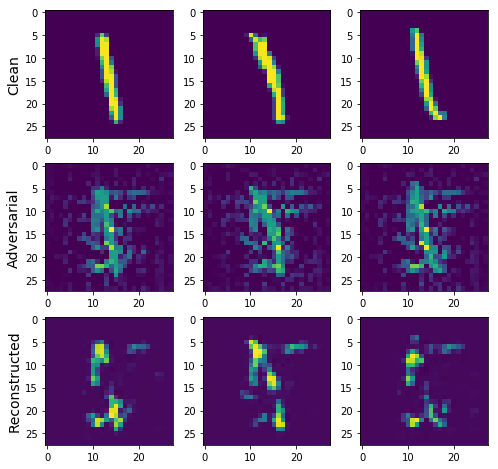

In [8]:
unique, counts = np.unique(100*label+10*adv_pdt+purified_pdt, return_counts=True)
print('Statistics:', dict(zip(unique, counts)))

fig=plt.figure(figsize=(8,8))
start = 0
for k in range(3):
    fig.add_subplot(3,3,k+1)
    plt.imshow((clean[start+k,] * 255).astype(np.int).reshape(28,28))
    if k == 0:
        plt.ylabel('Clean', fontsize=14)
    fig.add_subplot(3,3,k+4)
    plt.imshow((adv[start+k,] * 255).astype(np.int).reshape(28,28))
    if k == 0:
        plt.ylabel('Adversarial', fontsize=14)
    fig.add_subplot(3,3,k+7)
    plt.imshow((purified[start+k,] * 255).astype(np.int).reshape(28,28))
    if k == 0:
        plt.ylabel('Reconstructed', fontsize=14)
    
plt.show()

In [9]:
classifier_name = ['A', 'B', 'C']
APECWG = keras.models.load_model('./models/APEGAN-CW-G.h5')
for cn in classifier_name:
    BF = keras.models.load_model('../AdvGAN/models/Classifier-' + cn + '.h5')
    adv_pdt = np.argmax(BF.predict(adv), axis=1)
    purified1_pdt = np.argmax(BF.predict(APEG.predict(adv)), axis=1)
    purified2_pdt = np.argmax(BF.predict(APECWG.predict(adv)), axis=1)
    print('{}, {} : adv acc:{:.4f}, rct1 acc:{:.4f}, rct2 acc:{:.4f}'.format(
        target, cn, np.mean(adv_pdt==label), np.mean(purified1_pdt==label),
        np.mean(purified2_pdt==label)
    ))

/usr/local/lib/python3.5/dist-packages/keras/models.py:282: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


5, A : adv acc:0.0224, rct1 acc:0.0305, rct2 acc:0.1790
5, B : adv acc:0.0086, rct1 acc:0.0190, rct2 acc:0.1978
5, C : adv acc:0.0134, rct1 acc:0.0226, rct2 acc:0.1264
